In [17]:
%matplotlib inline


### Grading
The assignment is automatically graded. 

**Automatic grading**
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and click the button `Validate` to check that everything works as expected. Afterwards, you can submit your work.


# Section 1. Introduction to generative models

The tutorial part is based on the scikit-learn [tutorial](https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [19]:
# Create a mixture of two Gaussians
np.random.seed(1242314)
N = 2000
first_mode = norm(0, 1)
second_mode = norm(5, 2)
data = np.concatenate([first_mode.rvs(N), second_mode.rvs(N)]).reshape(-1, 1)

Bandwidth 0.1; mean test log-likelihood -28.3
Bandwidth 1; mean test log-likelihood -4.52
Bandwidth 3; mean test log-likelihood -3.45


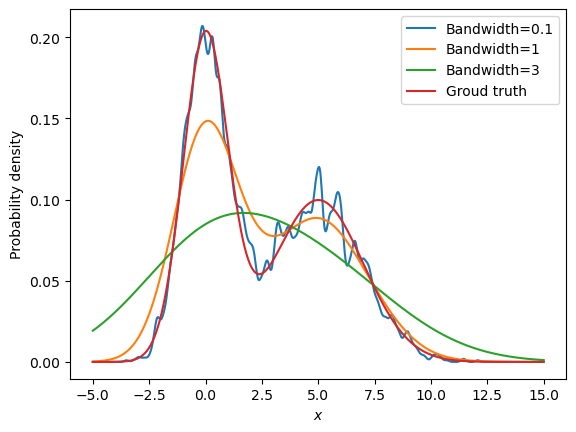

In [20]:
# Plot the probability densities for different values of bandwidth
fig, ax = plt.subplots()
x = np.linspace(-5, 15, num=1000).reshape(-1, 1)
for bandwidth in (0.1, 1, 3):
    estimator = KernelDensity(bandwidth=bandwidth).fit(data)
    predictions = estimator.score_samples(x)
    print(f"Bandwidth {bandwidth}; mean test log-likelihood {predictions.mean():.3}")
    # Predictions are log(p(x))
    probabilities = np.exp(predictions)
    ax.plot(x, probabilities, label=f"Bandwidth={bandwidth}")
ax.plot(x, 0.5*(first_mode.pdf(x.flatten()) + second_mode.pdf(x.flatten())), label="Groud truth")
ax.set_xlabel("$x$")
ax.set_ylabel("Probability density")
ax.legend();

In [21]:
# Load the digits data. It's almost like MNIST -- but a lot simplier for the simplier model
digits = load_digits()

# Project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

best bandwidth: 3.79269019073225


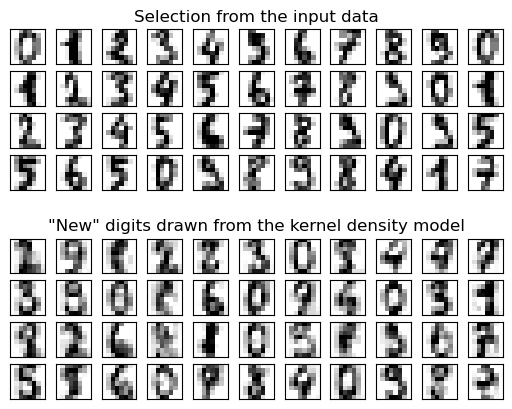

In [22]:
# Use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)
optimal_kde = grid.best_estimator_

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# Use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# Sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# Turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# Plot the real digits and the sampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

## Task 1
Plot the optimal bandwidth for the combination of two Gaussians as a function of the training dataset size for training dataset size in `np.linspace(10, 5000, num=10)`. Use `generate_sample` for generating the training data. Given that it is possible to generate an infinite amount of data, it is possible to find the answer with arbitrary precision. For the purpose of this task it is enough to evaluate the performance with bandwidth in ` np.logspace(-1, 1, 20)` on 4-fold cross-validation.

In [23]:
first_mode = norm(0, 1)
second_mode = norm(5, 2)
def generate_sample(sample_size:int):
    """
    Produces a toy dataset
    Args:
        sample_size:int -- the desired sample size
    Returns:
        np.array(sample_size, 1) -- a toy dataset with single feature and sample_size examples
    """
    half_size = sample_size // 2
    # In the case of an odd sample size
    second_half_size = sample_size - half_size
    return np.concatenate([first_mode.rvs(half_size), second_mode.rvs(second_half_size)]).reshape(-1, 1)

In [24]:
sizes = np.linspace(10, 5000, num=10, dtype=np.uint32) # training data sizes

# find optimal bandwidth for each training size
### YOUR CODE HERE
bandwidths = []
for size in sizes:
    data = generate_sample(size)
    params = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), params, cv=4)
    grid.fit(data)
    optimal_kde = grid.best_estimator_
    bandwidths.append(optimal_kde.bandwidth)

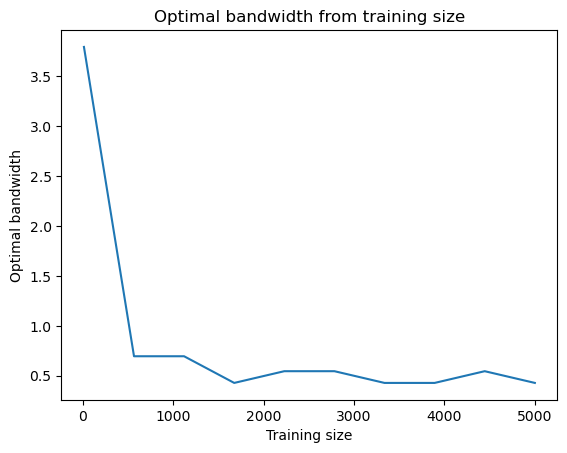

In [25]:
# plot optimal bandwidth from training size

### YOUR CODE HERE
plt.plot(sizes, bandwidths)
plt.xlabel("Training size")
plt.ylabel("Optimal bandwidth")
plt.title("Optimal bandwidth from training size")
plt.show()

### Task 2
Use your creativity, physical intuition, knowledge of statistics and ability to read the [KernelDensity documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) to find the  optimal kernel density parameters for training dataset size=134. Use `generate_sample` for generating as much training and testing data as you desire. Note: 134 is a low number, so make sure your solution is not overfitted to a single training sample. The goal is to have the mean log-likelihood on a test sample drawn from the same distribution > -2.38

In [26]:
# optimal_params = <your params>
# E.g. optimal_params = {"bandwidth": 2., "kernel": "epanechnikov"}

There are many cells below due to the structure of our solution and testing. You can use any number of them.

In [30]:
params_grid = {
  ### YOUR CODE HERE    
  'bandwidth': np.logspace(-1, 1, 20),
  'kernel': ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
}

# optimal_params = ??? ### YOUR CODE HERE
iterations = 10
train_sizes = [130, 134, 138, 142]
test_size = 1000

# Generate test data
test_data = generate_sample(test_size)

best_params = None
best_mean_log_likelihood = float('-inf')

# Loop through different training sizes
for train_size in train_sizes:
    print(f"Training size: {train_size}")

    # Initialize arrays to store optimal parameters and mean log-likelihoods
    optimal_params = []
    mean_log_likelihoods = []

    # Perform grid search with cross-validation for multiple iterations
    for i in range(iterations):
        train_data = generate_sample(train_size)

        grid = GridSearchCV(KernelDensity(), params_grid, cv=4)
        grid.fit(train_data)
        optimal_kde = grid.best_estimator_

        optimal_params.append(grid.best_params_)
        test_log_likelihood = optimal_kde.score_samples(test_data)
        mean_test_log_likelihood = test_log_likelihood.mean()
        mean_log_likelihoods.append(mean_test_log_likelihood)

        if mean_test_log_likelihood > best_mean_log_likelihood:
            best_mean_log_likelihood = mean_test_log_likelihood
            best_params = grid.best_params_

    # Filter out infinite values
    filtered_bandwidths = [params["bandwidth"] for params in optimal_params if not np.isinf(params["bandwidth"])]
    filtered_mean_log_likelihoods = [ll for ll in mean_log_likelihoods if not np.isinf(ll)]

    # Average the optimal bandwidth and print the optimal parameters
    average_bandwidth = np.mean(filtered_bandwidths) if filtered_bandwidths else None
    #print("Average optimal bandwidth: ", average_bandwidth)

    # Print the average mean log-likelihood on test data
    average_mean_log_likelihood = np.mean(filtered_mean_log_likelihoods) if filtered_mean_log_likelihoods else None
    print("Average mean test log-likelihood: ", average_mean_log_likelihood)
    print()

# Print the most optimal parameters found
print("Most optimal parameters:")
#print(best_params)

optimal_params = best_params

Training size: 130


/home/mid/miniconda3/envs/env_310/lib/python3.10/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-114.57507339          -inf          -inf  -98.05989446          -inf
          -inf -103.33570724          -inf          -inf  -94.29264569
          -inf          -inf  -96.3586309           -inf          -inf
  -91.42329279          -inf          -inf  -91.84427342          -inf
          -inf  -89.27426626          -inf          -inf  -88.85791518
          -inf          -inf  -87.71869588          -inf          -inf
  -86.88798699          -inf          -inf  -86.65509412          -inf
          -inf  -85.70067915          -inf          -inf  -85.99482403
          -inf          -inf  -85.1547405           -inf          -inf
  -85.65971346          -inf          -inf  -85.06987809  -85.40462905
  -86.85831769  -85.5847616   -87.77834035  -87.11260997  -85.28568348
  -84.05786194  -85.24951689  -85.718115    -85.9889652 

Average mean test log-likelihood:  -2.355961917148183

Training size: 134


/home/mid/miniconda3/envs/env_310/lib/python3.10/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-353.03337547          -inf          -inf -108.90117861          -inf
          -inf -250.69448254          -inf          -inf -103.50315542
          -inf          -inf -187.89851049          -inf          -inf
  -99.50807575          -inf          -inf -149.43577935          -inf
          -inf  -96.55961075          -inf          -inf -125.93327032
          -inf          -inf  -94.38232823          -inf          -inf
 -111.58051928          -inf          -inf  -92.76832434          -inf
          -inf -102.79962105          -inf          -inf  -91.56729641
          -inf          -inf  -97.38688128          -inf          -inf
  -90.68017508          -inf          -inf  -93.98796286          -inf
          -inf  -90.0501422           -inf          -inf  -91.88020011
          -inf          -inf  -89.65030098          -inf

Average mean test log-likelihood:  -2.378492302639407

Training size: 138


/home/mid/miniconda3/envs/env_310/lib/python3.10/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-181.1046138           -inf          -inf -107.90257228          -inf
          -inf -146.13390811          -inf          -inf -103.64818718
          -inf          -inf -124.88006523          -inf          -inf
 -100.49257188          -inf          -inf -111.90412696          -inf
          -inf  -98.16399404          -inf          -inf -103.99462928
          -inf          -inf  -96.46714783          -inf          -inf
  -99.29340895          -inf          -inf  -95.24942456          -inf
          -inf  -96.59207923          -inf          -inf  -94.39440376
          -inf          -inf  -95.06388411          -inf          -inf
  -93.82709777          -inf          -inf  -94.20597473          -inf
          -inf  -93.50401486          -inf          -inf  -93.81133548
          -inf          -inf  -93.39050696          -inf

Average mean test log-likelihood:  -2.362925028362125

Training size: 142


/home/mid/miniconda3/envs/env_310/lib/python3.10/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-104.79107853          -inf          -inf  -99.76950905          -inf
          -inf  -99.57191653          -inf          -inf  -97.39291359
          -inf          -inf  -96.55506457          -inf          -inf
  -95.7594573           -inf          -inf  -94.8771374           -inf
          -inf  -94.6772105           -inf          -inf  -94.01520883
          -inf          -inf  -94.0112967           -inf          -inf
  -93.58753804          -inf          -inf  -93.67618178          -inf
          -inf  -93.41046533  -94.26898499  -95.30941646  -93.62577418
  -96.12003326  -95.48854056  -93.47558096  -94.16215079  -93.92408267
  -93.83096916  -94.38793514  -94.00535741  -93.84177694  -94.00136843
  -93.7869573   -94.25134801  -93.94876325  -93.79120946  -94.55312678
  -93.42298597  -93.48827572  -94.82588718  -93.54947152

Average mean test log-likelihood:  -2.3562208792406247

Most optimal parameters:


/home/mid/miniconda3/envs/env_310/lib/python3.10/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-163.26813837          -inf          -inf -106.49203251          -inf
          -inf -136.14103601          -inf          -inf -103.02187642
          -inf          -inf -119.55075805          -inf          -inf
 -100.43772372          -inf          -inf -109.42671537          -inf
          -inf  -98.50613539          -inf          -inf -103.27367408
          -inf          -inf  -97.05579027          -inf          -inf
  -99.56508613          -inf          -inf  -95.96837046          -inf
          -inf  -97.31387493          -inf          -inf  -95.17489472
          -inf          -inf  -95.89129378          -inf          -inf
  -94.64330814          -inf          -inf  -94.99552915          -inf
          -inf  -94.35525096          -inf          -inf  -94.55524558
          -inf          -inf  -94.28657551          -inf

In [28]:

N_SAMPLES = 134
TEST_SIZE = 1000
def evaluate_params(params, n_trials):
    all_scores = []
    for trial in range(n_trials):
        train_set = generate_sample(N_SAMPLES)
        estimator = KernelDensity(**params).fit(train_set)
        scores = estimator.score_samples(generate_sample(TEST_SIZE))
        trial_result = scores.mean()
        if not(np.isfinite(trial_result)):
            return trial_result
        all_scores.append(trial_result)
    return np.mean(all_scores)
score = evaluate_params(optimal_params, n_trials=1000)

In [29]:
print(score)

-inf
